<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE06LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

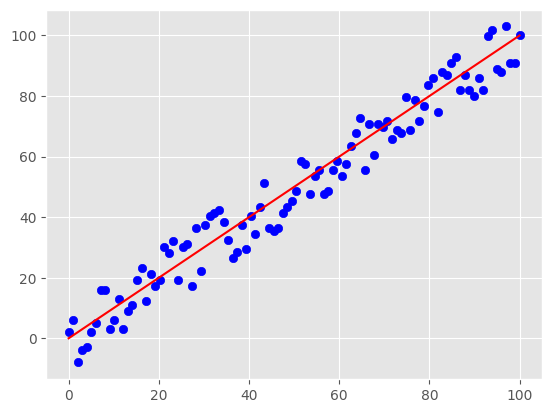

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


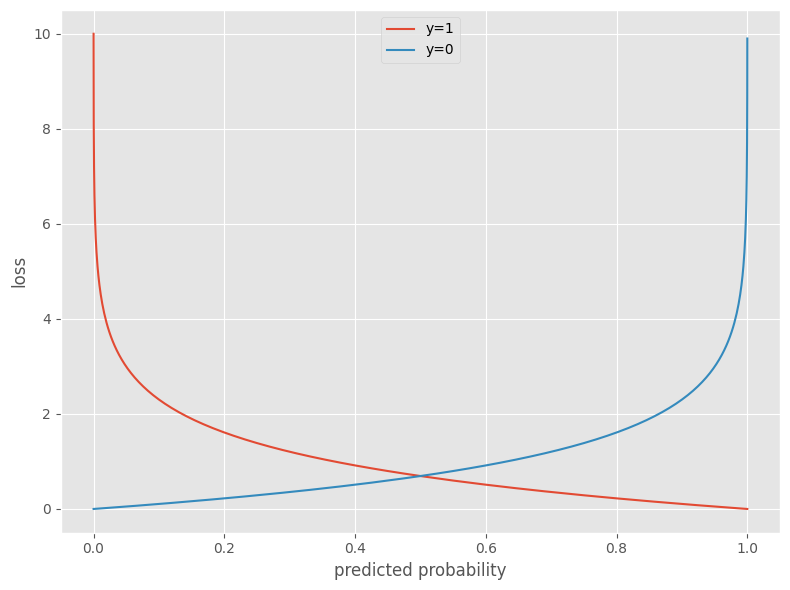

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

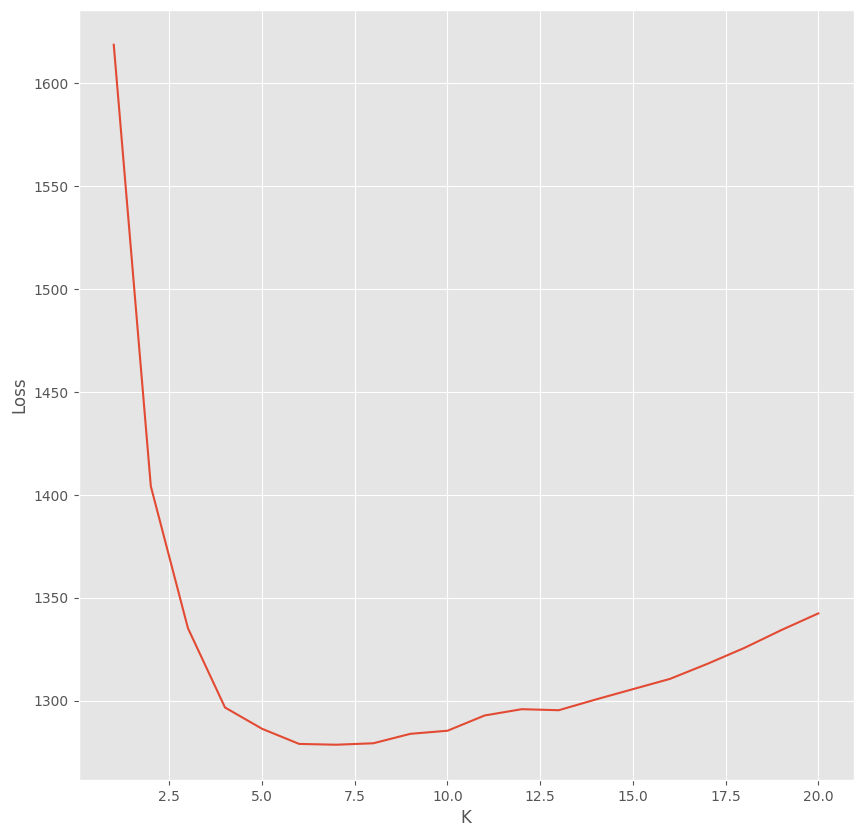

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

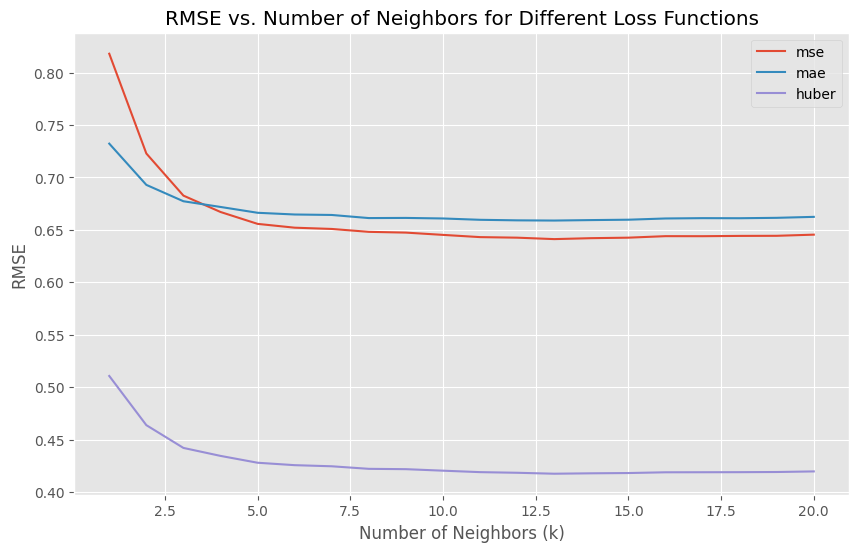

In [14]:
#EXERCISE 1
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to train KNN-regression models with different loss functions
def train_knn_regression(loss, k):
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='auto', p=2, metric='minkowski', metric_params=None, n_jobs=None)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if loss == 'mse':
        error = mean_squared_error(y_test, y_pred)
    elif loss == 'mae':
        error = mean_absolute_error(y_test, y_pred)
    elif loss == 'huber':
        # Implementing Huber loss manually
        delta = 1.0  # Parameter for Huber loss
        error = np.mean(np.where(np.abs(y_test - y_pred) <= delta, 0.5 * (y_test - y_pred) ** 2, delta * (np.abs(y_test - y_pred) - 0.5 * delta)))

    return error

# Define a function to evaluate models with different loss functions
def evaluate(loss):
    rmse_val = []
    for k in range(1, 21):
        error = train_knn_regression(loss, k)
        rmse_val.append(sqrt(error))
    return rmse_val

# Evaluate models with different loss functions
losses = ['mse', 'mae', 'huber']
results = {}
for loss in losses:
    results[loss] = evaluate(loss)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for loss in losses:
    plt.plot(range(1, 21), results[loss], label=loss)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Neighbors for Different Loss Functions')
plt.legend()
plt.grid(True)
plt.show()


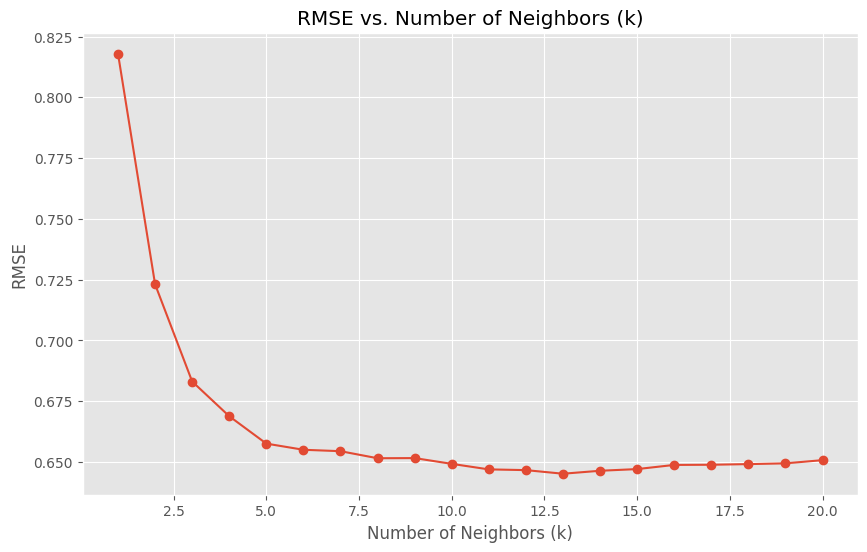

Optimal value of k with the lowest RMSE: 13


In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to train KNN-regression models with different values of k
def train_knn_regression(k_values, X_train, y_train, X_test):
    rmse_values = []
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmse_values.append(rmse)
    return rmse_values

# Define a range of k values to try
k_values = range(1, 21)

# Train KNN-regression models with different values of k
rmse_values = train_knn_regression(k_values, X_train_scaled, y_train, X_test_scaled)

# Plot RMSE values for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Find the optimal value of k with the lowest RMSE
optimal_k = k_values[rmse_values.index(min(rmse_values))]
print(f'Optimal value of k with the lowest RMSE: {optimal_k}')
